In [1]:
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pyabf
import pandas as pd
from scipy.signal import medfilt


In [9]:
## Synaptic Connectivity (Paired Recording)
data_path = '../data/1_CrayfishNeuromuscularJunction/lab3/21915007.abf' ## paired, no splash
data_tmp = pyabf.ABF(data_path)


In [10]:
print(type(data_tmp))
print(data_tmp)

<class 'pyabf.abf.ABF'>
ABF (v2.6) with 2 channels (uV, mV), sampled at 10.0 kHz, containing 1 sweep, having no tags, with a total length of 0.31 minutes, recorded without a protocol file.


In [11]:
# nerve extracellular recording
data_tmp.setSweep(sweepNumber=0, channel=0) 
nerve_v = data_tmp.sweepY
nerve_label = data_tmp.sweepLabelY

times = data_tmp.sweepX # time in seconds!  we don't have to worry about the time array

# muscle intracellular recording
data_tmp.setSweep(sweepNumber=0, channel=1) 
muscle_v = data_tmp.sweepY
muscle_label = data_tmp.sweepLabelY


print(nerve_label, nerve_v)
print(muscle_label, muscle_v)
print(times_n, times_m)

Suction (uV) [46.3867 54.3213 36.6211 ...  2.4414  0.9155 -2.4414]
Membrane Potential (mV) [0.0305 0.     0.     ... 0.7935 0.7629 0.7324]
[ 0.      0.0001  0.0002 ... 35.3789 35.379  35.3791] [ 0.      0.0001  0.0002 ... 35.3789 35.379  35.3791]


In [12]:
data_df = pd.DataFrame(columns = ['times','nerve_v','muscle_v'], 
                       data = np.stack([times, nerve_v, muscle_v]).T)

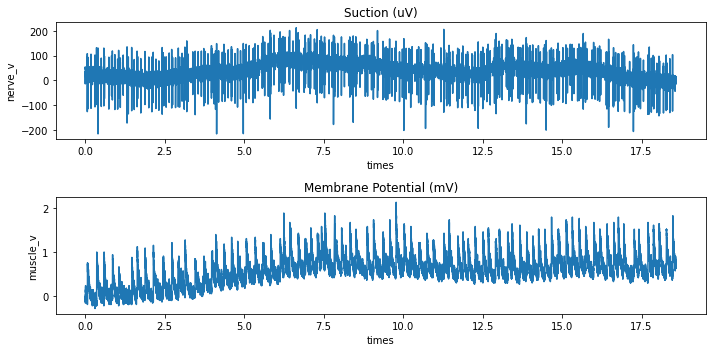

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharey=False)

sns.lineplot(ax=axes[0], data=data_df, x='times', y='nerve_v')
axes[0].set_title(nerve_label)

sns.lineplot(ax=axes[1], data=data_df, x='times', y='muscle_v')
axes[1].set_title(muscle_label)

plt.tight_layout()

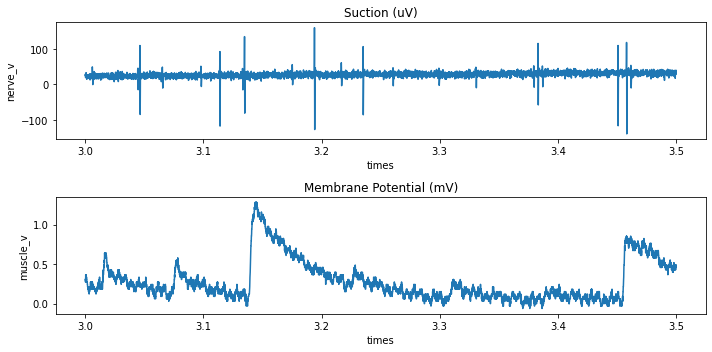

In [24]:
# ## zoom in
window = [30000,35000]
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharey=False)

sns.lineplot(ax=axes[0], data=data_df.loc[window[0]:window[1]], x='times', y='nerve_v')
axes[0].set_title(nerve_label)

sns.lineplot(ax=axes[1], data=data_df.loc[window[0]:window[1]], x='times', y='muscle_v')
axes[1].set_title(muscle_label)

plt.tight_layout()
 

filtering

In [30]:
correction = medfilt(data_df.muscle_v, kernel_size=801)
data_df['muscle_v_filt'] = data_df.muscle_v - correction + np.median(data_df.muscle_v)

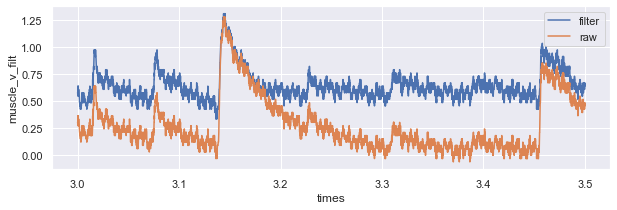

In [33]:
sns.set(rc={'figure.figsize':(10,3)})

sns.lineplot(data=data_df[window[0]:window[1]], x='times', y='muscle_v_filt', label = 'filter')
sns.lineplot(data=data_df[window[0]:window[1]], x='times', y='muscle_v', label = 'raw')

plt.legend()

plt.show()

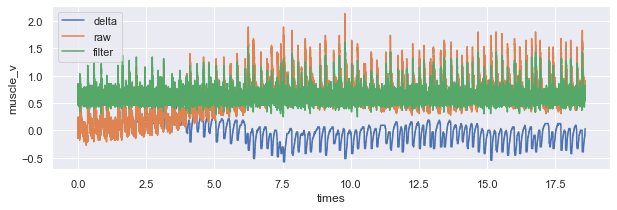

In [38]:
## zoom out
sns.lineplot(data=data_df, x='times', 
             y=data_df.muscle_v_filt-data_df.muscle_v, 
             label = 'delta')

sns.lineplot(data=data_df, x='times', 
             y=data_df.muscle_v,
             label = 'raw')

sns.lineplot(data=data_df, x='times', 
             y=data_df.muscle_v_filt,
             label = 'filter')

plt.legend()